In [64]:
import os
import pandas as pd
import numpy as np

from fontTools.ttLib import TTFont
from fontTools.pens.svgPathPen import SVGPathPen

import svgpath2mpl
from svgpath2mpl import parse_path

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

In [65]:
fdir = '../ff/'
#os.listdir(fdir)
fnam = 'ff1.ttf'
font = TTFont(fdir+fnam)

In [66]:
txt='abcd'

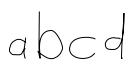

In [122]:
sca = 1
gpx = 10
gpy = 10
fig, axs = plt.subplots(1, len(txt), figsize=((len(txt)*sca), sca))
for t in range(len(txt)):
    char = txt[t]
    #char = 'a'
    #
    cmap = font.getBestCmap()
    #cmap
    #
    glyphSet = font.getGlyphSet()
    svgpen = SVGPathPen(glyphSet)
    glyph = glyphSet[char]
    #
    glyph.draw(svgpen)
    cpath = svgpen.getCommands()
    cpath = cpath.replace('Z','') # replace 'Z' = 'closepath'
    #cpath
    #
    pcpath = svgpath2mpl.parse_path(cpath)
    vv = pcpath.vertices
    vdf = pd.DataFrame(vv)
    vxmi = vdf[0].min()
    vxma = vdf[0].max()
    vymi = vdf[1].min()
    vyma = vdf[1].max()
    #
    #
    patch = mpl.patches.PathPatch(
        pcpath, 
        facecolor='none', 
        edgecolor='black', 
        linewidth=1)
    patch.set_transform(axs[t].transData)
    axs[t].add_patch(patch)
    axs[t].set_aspect(1)
    axs[t].axis("off")
    axs[t].set_xticklabels([])
    axs[t].set_yticklabels([])
    axs[t].set_xlim([vxmi-50, vxma+50])
    axs[t].set_ylim([vymi-50, 1300])
# set the spacing between subplots
fig.subplots_adjust(left=0, wspace=-0.8)
plt.savefig("ttf-text1.svg")
plt.show()